### Assignment_2: Unsupervised Data Mining

Q1. 30 Points

Q2. 30 Points

Q3. 20 Points

Q4. 20 Points

Q5. 10 Bonus Points

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\1290734546.py:17: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


##### The things you should pay attention:

Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

Before you submit your assignment, make sure everything runs as expected. If you have sufficient time, please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

Good Luck!

UP

### Problem_1: Dimension Reduction

With Problem_1, we aim to have a better understanding of dimension reduction with PCA. We will use Delta Airline data. Delta and other major airlines have data on all of their aircrafts on their website. [e.g.](https://www.delta.com/content/www/en_US/traveling-with-us/airports-and-aircraft/Aircraft.html)

We will use delta.csv uploaded on Canvas Module for this assignment.

This data set has 34 columns (including the names of the aircrafts) on 44 aircrafts. It inclues both quantitative measurements such as cruising speed, accommodation and range in miles, as well as categorical data, such as whether a particular aircraft has Wi-Fi or video. These binary are assigned values of either 1 or 0, for yes or no respectively.

In [2]:
df = pd.read_csv('delta.csv', index_col='Aircraft')


In [3]:
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
Aircraft,,,,,,,,,,,,,,,,,,,,,
Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


First, let's look at the attributes related to the aircraft physical characteristics:

Cruising Speed (mph)
Range (miles)
Engines
Wingspan (ft)
Tail Height (ft)
Length (ft)
These six variables are about in the middle of the data frame (and it's part of your task to figure out where they are located).

Write a function named plot_pairgrid() that takes a pandas.DataFrame and uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics listed above. The plots on the diagonal should be histograms of corresponding attributes, and the off-diagonal should be scatter plots.

In [4]:

def plot_pairgrid(df):
    '''
    Uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from importing delta.csv.
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    # YOUR CODE HERE
    ax = sns.PairGrid(df)
    for x in ax.axes.flat:
        x.tick_params(axis='both', labelleft=True, labelbottom=True)
    ax.map_diag(sns.histplot, bins = 10)
    ax.map_offdiag(sns.scatterplot)
    
    return ax


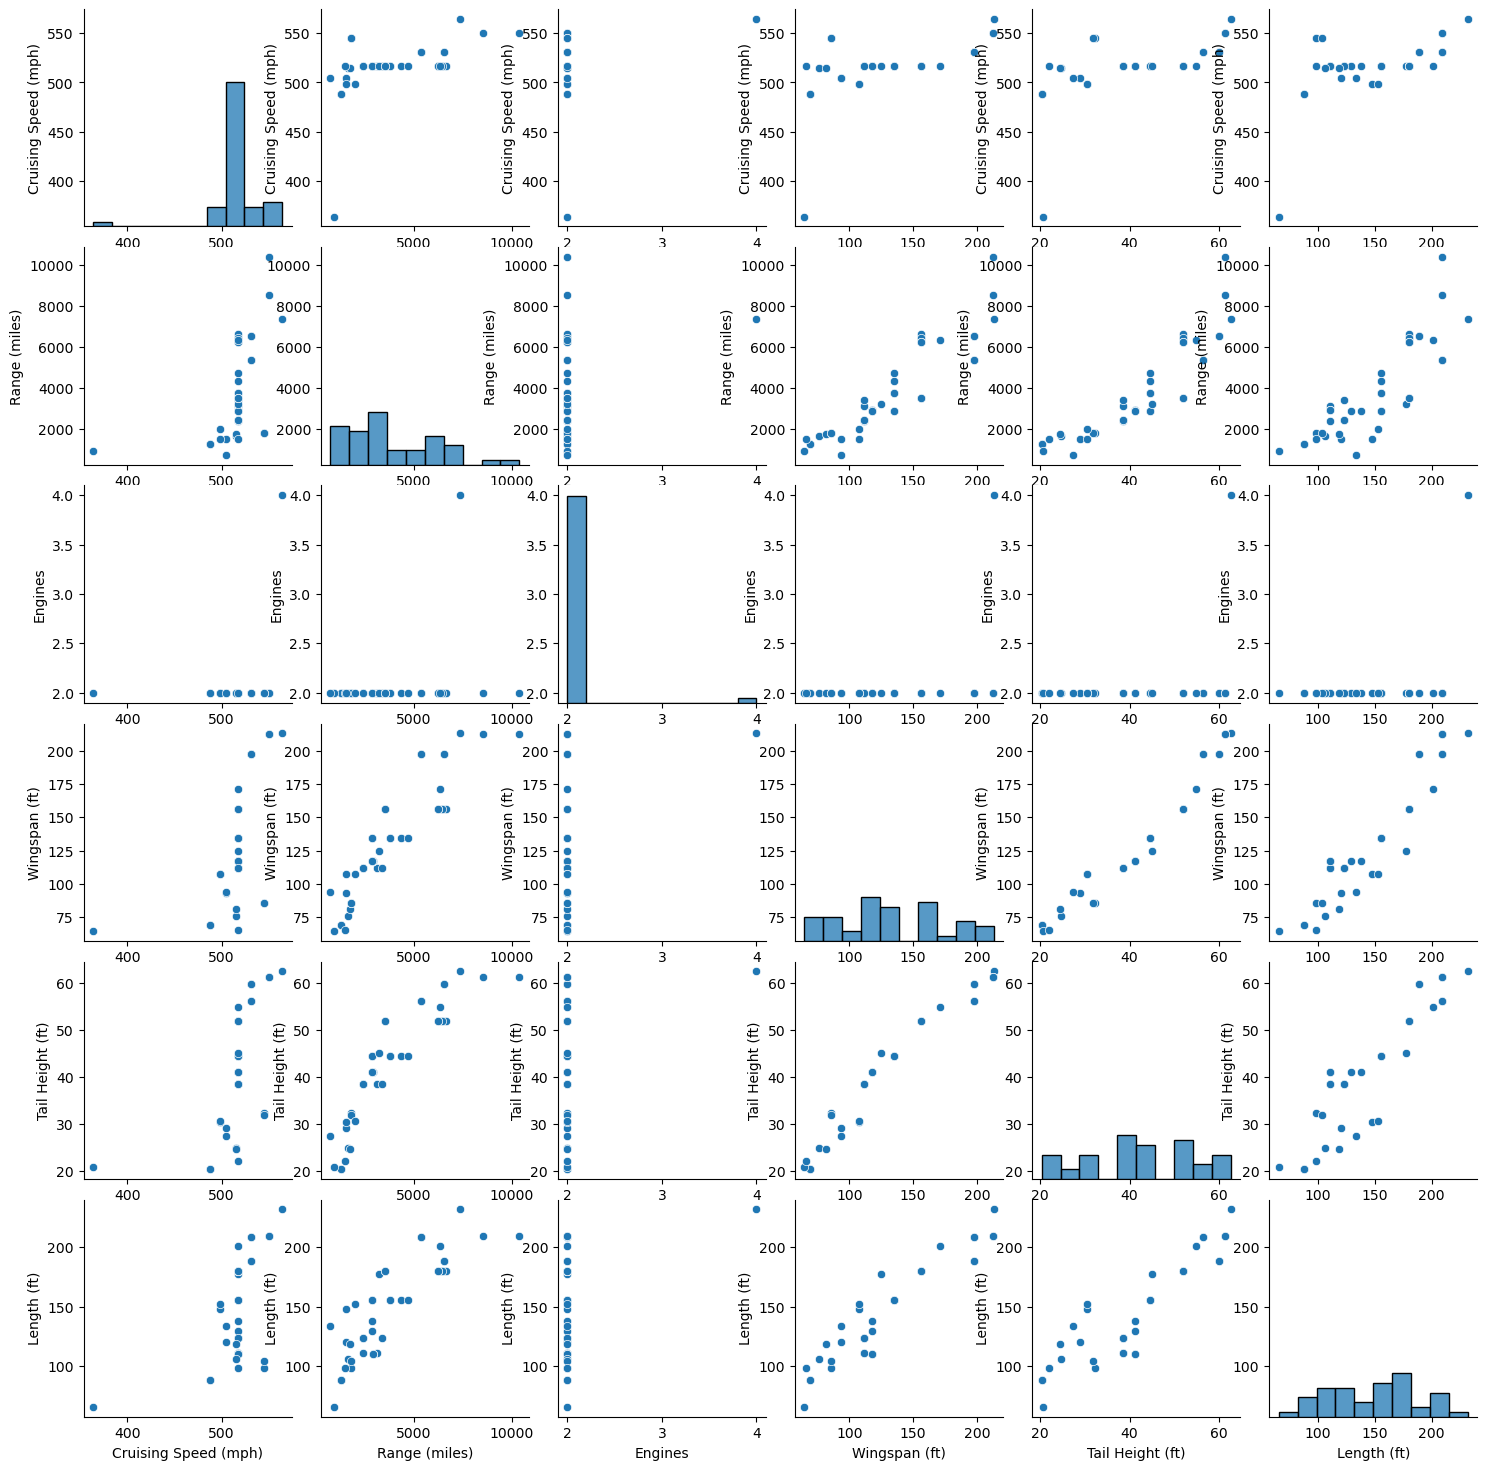

In [5]:
pg = plot_pairgrid(df[['Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']])

We observe that pretty strong positive correlations between all these variables, as most of them are related to the aircraft’s overall size. Remarkably there is an almost perfectly linear relationship between wingspan and tail height.

The exception here is engines. There is one outlier which has four engines, while all the other aircraft have two. In this way the engines variable is really more like a categorical variable, but we shall as the analysis progresses that this is not really important, as there are other variables which more strongly discern the aircraft from one another than this.

In [6]:
### This is the unittest cell, please just run this cell without any modification once you generated "pg" above

cols = ['Cruising Speed (mph)', 'Range (miles)', 'Engines',
        'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']

assert_is_instance(pg.fig, plt.Figure)
assert_equal(set(pg.data.columns), set(cols))

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 10)

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Apply PCA
I assume we dont know anything about dimensionality reduction techniques and just naively apply principle components to the data.

Write a function named fit_pca() that takes a pandas.DataFrame and uses [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to fit a PCA model on all values of df.

In [7]:
 def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    pca = PCA(n_components = n_components)
    pca.fit(df)
    
    
    return pca

In [8]:
# we keep all components by setting n_components = no of cols in df. FYI df.shape[0] returns # of rows, len(df.columns) also works similar
pca_naive = fit_pca(df, n_components=df.shape[1])

In [9]:
assert_is_instance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert_equal(pca_naive.n_components_, df.shape[1])
assert_equal(pca_naive.whiten, False)

In [10]:
def plot_naive_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(7,5))

    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)

    return ax

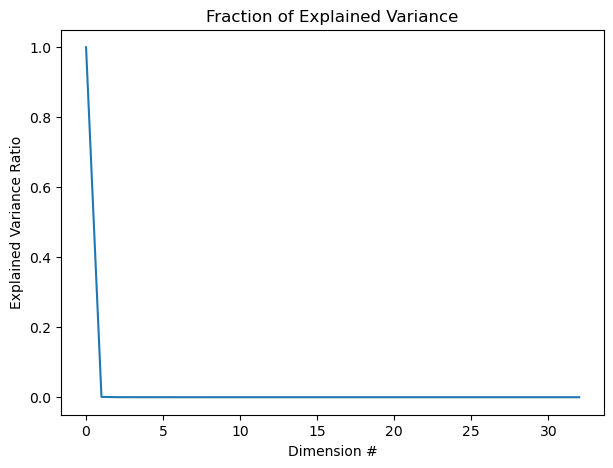

In [11]:
naive_var = plot_naive_variance(pca_naive)

In [12]:
assert_is_instance(naive_var, mpl.axes.Axes)
assert_equal(len(naive_var.lines), 1)

assert_is_not(len(naive_var.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(naive_var.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(naive_var.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

xdata, ydata = naive_var.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(df.shape[1])))
assert_array_almost_equal(ydata, pca_naive.explained_variance_ratio_)

In [13]:
abs_val = np.abs(pca_naive.components_[0])
max_pos = abs_val.argmax()
max_val = abs_val.max()

print('"{0}" accounts for {1:0.3f} % of the variance.'.format(df.columns[max_pos], max_val))

"Range (miles)" accounts for 0.999 % of the variance.


Taking this naive approach, we can see that the first principal component accounts for 99.9% of the variance in the data. (Note the y-axis is on a log scale.) Looking more closely, can we see that the first principle component is just the range in miles? This is because the scale of the different variables in the data set is quite variable.

PCA is a scale-dependent method. For example, if the range of one column is [-100, 100], while the that of another column is [-0.1, 0.1], PCA will place more weight on the feature with larger values. One way to avoid this is to standardize a data set by scaling each feature so that the individual features all look like Gausssian distributions with zero mean and unit variance. 

Please write a function named standardize() where StandardScaler function of sklearn will be used to scale each feature so that they have zero mean and unit variance.

In [14]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    scaler = StandardScaler().fit(df)
    scaled = scaler.transform(df)
    
    
    return scaled

In [15]:
scaled = standardize(df)


In [16]:
rng = np.random.RandomState(0)
n_samples, n_features = 4, 5

df_t1 = pd.DataFrame(
    rng.randn(n_samples, n_features),
    index=[i for i in 'abcd'],
    columns=[c for c  in 'abcde']
    )
df_t1.loc[:, 'a'] = 0.0  # make first feature zero

scaled_t1 = standardize(df_t1)

assert_is_not(df_t1, scaled_t1)
assert_is_instance(scaled_t1, np.ndarray)
assert_array_almost_equal(
    scaled_t1.mean(axis=0),
    n_features * [0.0] # scaled data should have mean zero
    ) 
assert_array_almost_equal(
    scaled_t1.std(axis=0),
    [0., 1., 1., 1., 1.] # unit variance except for 1st feature
    )

In [17]:
# we keep only 10 components
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

Let's take another look to the explained variance of the first 10 principal components from the scaled data.

In [18]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(7,5))

    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    
    
    
    return ax

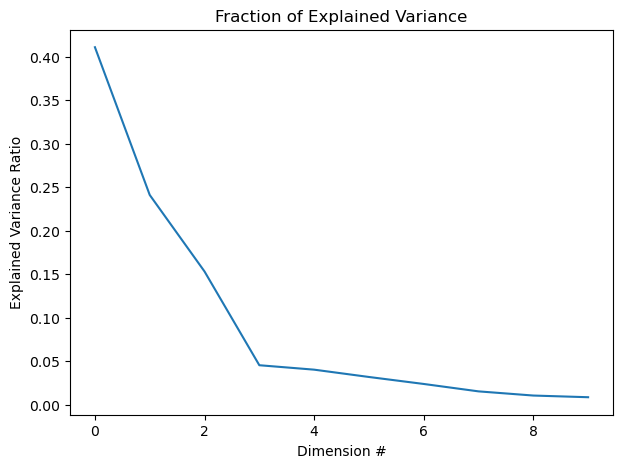

In [19]:
ax = plot_scaled_variance(pca)

In [20]:
assert_is_instance(ax, mpl.axes.Axes)
assert_equal(len(ax.lines), 1)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

xdata, ydata = ax.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(n_components)))
assert_array_almost_equal(ydata, pca.explained_variance_ratio_)

Nice, it looks good to go. There are various rules of thumb for selecting the number of principal components to retain in an analysis of this type, one of which I’ve experienced about is:

Pick the number of components which explain 85% or greater of the variation.
So, we will keep the first 4 principal components (remember that we are counting from zero, so we are keeping 0th, 1st, 2nd, and 3rd components—four components). Later in this assignment, we will use these four components to fit a $k$-means model. Before we move on to the next problem, let's apply the dimensional reduction on the scaled data. (In the previous sections, we didn't actually have to apply  transform(). This step is to make sure that the scaled data is actually "transformed".)

Write a function named reduce() that takes a PCA model (that is already trained on array) and a Numpy array, and applies dimensional reduction on the array.

In [21]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    reduced = pca.transform(array)

    
    return reduced

In [22]:
reduced = reduce(pca, scaled)

In [23]:
assert_is_instance(reduced, np.ndarray)
assert_array_almost_equal(reduced, pca.fit_transform(scaled))

In [24]:
# Save the reduced data to the same directory of your notebook  as 'delta_reeuced.npy' that we will use later on
np.save('delta_reduced.npy', reduced)

### Problem 2. Clustering

We will use the first 10 principal components of the Delta Airline data set that we created in the first step.


In [25]:
##Standard imports just in case

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

In [26]:
## Reload the the first 10 components of delta dataset
reduced = np.load('delta_reduced.npy')


Write a function named cluster() that fits a k-means clustering algorithm, and returns a tuple (sklearn.cluster.k_means_.KMeans, np.array). The second element of the tuple is a 1-d array that contains the predictions of k-means clustering, i.e. which cluster each data point belongs to. Please remember how we were generating and using the labels for seeds, movements, iris etc.


Use default values for all parameters in KMeans() execept for n_clusters and random_state.

In [27]:
def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    model = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 500, random_state = random_state)
    clusters = model.fit_predict(array)
   
    
    return model, clusters

#here we return fitted (model) and predicted (clusters) arrays as a tuple

In [28]:
k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(1), n_clusters=5)

assert_is_instance(k_means_t, sklearn.cluster._kmeans.KMeans)
assert_is_instance(cluster_t, np.ndarray)
assert_equal(k_means_t.n_init, 10)
assert_equal(k_means_t.n_clusters, 5)
assert_equal(len(cluster_t), len(reduced))
assert_true((cluster_t < 5).all()) # n_cluster = 5 so labels should be between 0 and 5
assert_true((cluster_t >= 0).all())
labels_gold = -1. * np.ones(len(reduced), dtype=np.int)
mindist = np.empty(len(reduced))
mindist.fill(np.infty)
for i in range(5):
    dist = np.sum((reduced - k_means_t.cluster_centers_[i])**2., axis=1)
    labels_gold[dist < mindist] = i
    mindist = np.minimum(dist, mindist)
assert_true((mindist >= 0.0).all())
assert_true((labels_gold != -1).all())
assert_array_equal(labels_gold, cluster_t)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18076\667251704.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_gold = -1. * np.ones(len(reduced), dtype=np.int)


The scikit-learn documentation on sklearn.cluster.KMeans says that [Kmeans cluster](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has the inertia value in the inertia_ attribute. So we can vary the number of clusters in KMeans, plot KMeans.inertia_ as a function of the number of clusters, and pick the "elbow" in the plot.

Always use check_random_state(0) to seed the random number generator.


In [29]:
def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    x_axis = range(start, end+1)
    inertia = []

    for i in x_axis:
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, random_state = check_random_state(0))
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)    
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    

    return ax

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


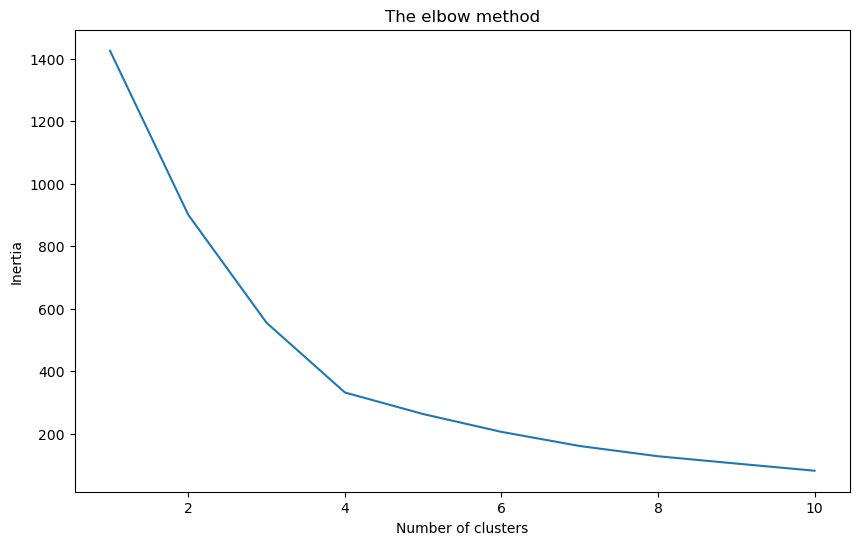

In [30]:
inertia = plot_inertia(reduced)

In [31]:
assert_is_instance(inertia, mpl.axes.Axes)
assert_true(len(inertia.lines) >= 1)

xdata, ydata = inertia.lines[0].get_xydata().T

for i in range(1, 11):
    k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(0), n_clusters=i)
    assert_array_equal(xdata[i - 1], i)
    assert_almost_equal(ydata[i - 1], k_means_t.inertia_)

assert_is_not(len(inertia.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(inertia.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(inertia.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
def plot_pair(reduced, clusters):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. Comes from importing delta_reduced.npy
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    df = pd.DataFrame(reduced)
    df['c'] = clusters
    subset = [0,1,2,3, 'c']
    columns = [0,1,2,3]
    
    ax = sns.PairGrid(df[subset], vars = columns, hue = 'c')
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    
    return ax

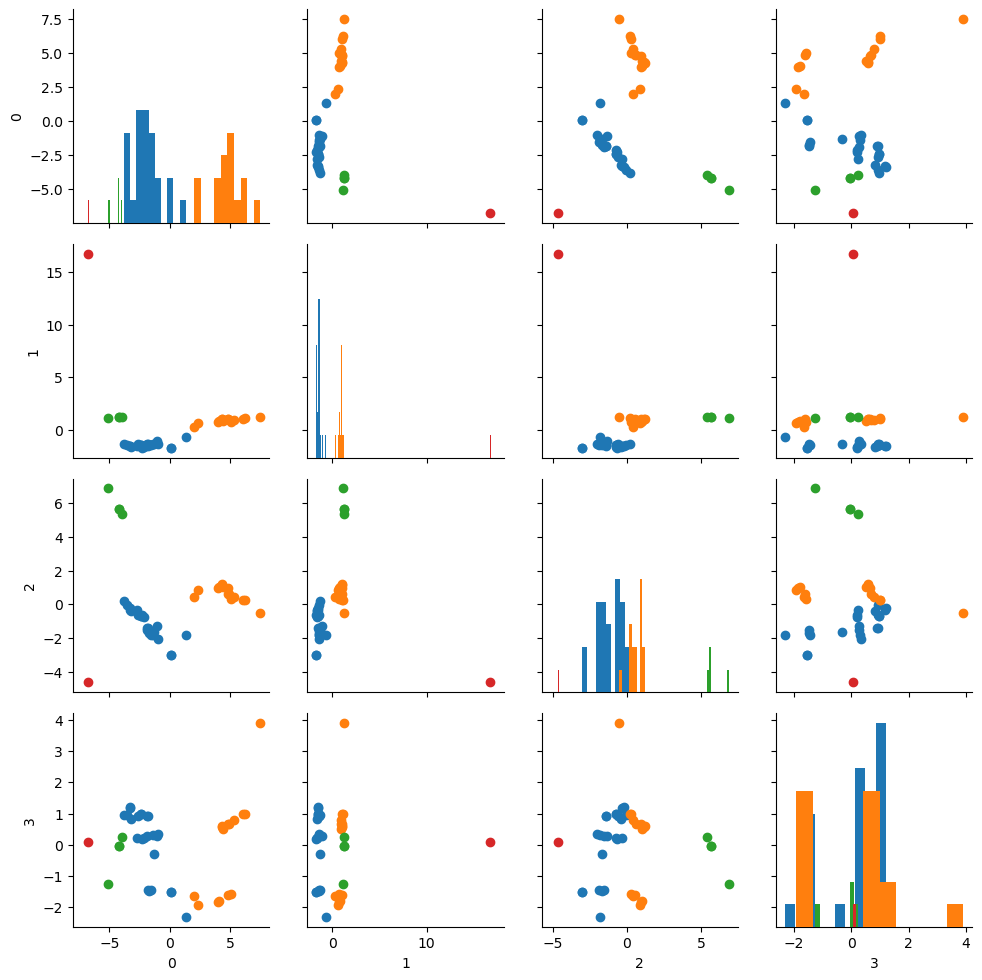

In [33]:
k_means, clusters = cluster(reduced, random_state=check_random_state(0), n_clusters=4)
pg = plot_pair(reduced, clusters)

We observe that the one outlier is in its own cluster, there’s 3 or 4 points in the other clusters and the remainder are split into two clusters of greater size.

In [34]:
assert_is_instance(pg.fig, plt.Figure)
assert_true(len(pg.data.columns) >= 4)

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 4 * 10) # 4 clusters with 10 patches in each histogram

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_out, y_out = ax.collections[0].get_offsets().T
    x_in = reduced[clusters == 0, j] # we only check the first cluster
    y_in = reduced[clusters == 0, i]
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = reduced[clusters == 0, j]
    y_in = reduced[clusters == 0, i]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Let's Continue our Analysis and brainstorm
You don't have to write any code in this section, but here's one interpretaion of what we have done.

Let's take a closer look at each cluster.

In [35]:

df = pd.read_csv('delta.csv', index_col='Aircraft')
df['Clusters'] = clusters
df['Aircraft'] = df.index
df_grouped = df.groupby('Clusters').mean()
print(df_grouped.Accommodation)

Clusters
0    153.625000
1    244.733333
2     44.500000
3     54.000000
Name: Accommodation, dtype: float64


In [36]:
print(df_grouped['Length (ft)'])

Clusters
0    137.048083
1    190.538400
2     84.810750
3    111.000000
Name: Length (ft), dtype: float64


Cluster 3 has only one aircraft:

In [37]:
clust3 = df[df.Clusters == 3]
print(clust3.Aircraft)

Aircraft
Airbus A319 VIP    Airbus A319 VIP
Name: Aircraft, dtype: object


Airbus A319 VIP is not one of Delta Airline's regular fleet and is one of Airbus corporate jets.

Cluster 2 has four aircrafts.

In [38]:
clust2 = df[df.Clusters == 2]
print(clust2.Aircraft)

Aircraft
CRJ 100/200 Pinnacle/SkyWest    CRJ 100/200 Pinnacle/SkyWest
CRJ 100/200 ExpressJet                CRJ 100/200 ExpressJet
E120                                                    E120
ERJ-145                                              ERJ-145
Name: Aircraft, dtype: object


These are small aircrafts and only have economy seats.

In [39]:
cols_seat = ['First Class', 'Business', 'Eco Comfort', 'Economy']
print(df.loc[clust2.index, cols_seat])

                              First Class  Business  Eco Comfort  Economy
Aircraft                                                                 
CRJ 100/200 Pinnacle/SkyWest            0         0            0        1
CRJ 100/200 ExpressJet                  0         0            0        1
E120                                    0         0            0        1
ERJ-145                                 0         0            0        1


In [40]:
clust1 = df[df.Clusters == 1]
print(clust1.Aircraft)

Aircraft
Airbus A330-200                      Airbus A330-200
Airbus A330-200 (3L2)          Airbus A330-200 (3L2)
Airbus A330-200 (3L3)          Airbus A330-200 (3L3)
Airbus A330-300                      Airbus A330-300
Boeing 747-400 (74S)            Boeing 747-400 (74S)
Boeing 757-200 (75E)            Boeing 757-200 (75E)
Boeing 757-200 (75X)            Boeing 757-200 (75X)
Boeing 767-300 (76G)            Boeing 767-300 (76G)
Boeing 767-300 (76L)            Boeing 767-300 (76L)
Boeing 767-300 (76T)            Boeing 767-300 (76T)
Boeing 767-300 (76Z V.1)    Boeing 767-300 (76Z V.1)
Boeing 767-300 (76Z V.2)    Boeing 767-300 (76Z V.2)
Boeing 767-400 (76D)            Boeing 767-400 (76D)
Boeing 777-200ER                    Boeing 777-200ER
Boeing 777-200LR                    Boeing 777-200LR
Name: Aircraft, dtype: object


Interesting, Cluster 1 aircrafts do not have first class seating.



In [41]:
print(df.loc[clust1.index, cols_seat])

                          First Class  Business  Eco Comfort  Economy
Aircraft                                                             
Airbus A330-200                     0         1            1        1
Airbus A330-200 (3L2)               0         1            1        1
Airbus A330-200 (3L3)               0         1            1        1
Airbus A330-300                     0         1            1        1
Boeing 747-400 (74S)                0         1            1        1
Boeing 757-200 (75E)                0         1            1        1
Boeing 757-200 (75X)                0         1            1        1
Boeing 767-300 (76G)                0         1            1        1
Boeing 767-300 (76L)                0         1            1        1
Boeing 767-300 (76T)                0         1            1        1
Boeing 767-300 (76Z V.1)            0         1            1        1
Boeing 767-300 (76Z V.2)            0         1            1        1
Boeing 767-400 (76D)

In [42]:
clust0 = df[df.Clusters == 0]
print(clust0.Aircraft)

Aircraft
Airbus A319                          Airbus A319
Airbus A320                          Airbus A320
Airbus A320 32-R                Airbus A320 32-R
Boeing 717                            Boeing 717
Boeing 737-700 (73W)        Boeing 737-700 (73W)
Boeing 737-800 (738)        Boeing 737-800 (738)
Boeing 737-800 (73H)        Boeing 737-800 (73H)
Boeing 737-900ER (739)    Boeing 737-900ER (739)
Boeing 757-200 (75A)        Boeing 757-200 (75A)
Boeing 757-200 (75M)        Boeing 757-200 (75M)
Boeing 757-200 (75N)        Boeing 757-200 (75N)
Boeing 757-200 (757)        Boeing 757-200 (757)
Boeing 757-200 (75V)        Boeing 757-200 (75V)
Boeing 757-300                    Boeing 757-300
Boeing 767-300 (76P)        Boeing 767-300 (76P)
Boeing 767-300 (76Q)        Boeing 767-300 (76Q)
Boeing 767-300 (76U)        Boeing 767-300 (76U)
CRJ 700                                  CRJ 700
CRJ 900                                  CRJ 900
E170                                        E170
E175       

The aircrafts in cluster 0 (except for one aircraft) have first class seating but no business class.



In [43]:
print(df.loc[clust0.index, cols_seat])

                        First Class  Business  Eco Comfort  Economy
Aircraft                                                           
Airbus A319                       1         0            1        1
Airbus A320                       1         0            1        1
Airbus A320 32-R                  1         0            1        1
Boeing 717                        1         0            1        1
Boeing 737-700 (73W)              1         0            1        1
Boeing 737-800 (738)              1         0            1        1
Boeing 737-800 (73H)              1         0            1        1
Boeing 737-900ER (739)            1         0            1        1
Boeing 757-200 (75A)              1         0            1        1
Boeing 757-200 (75M)              1         0            1        1
Boeing 757-200 (75N)              1         0            1        1
Boeing 757-200 (757)              1         0            1        1
Boeing 757-200 (75V)              1         0   

### Problem 3
(No Unit Tests in this portion)

Run DBSCAN on Iris.csv and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.


Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

Run KMeans on movements.csv compare/discuss the results with DBSCAN and Hierarchical Clustering (Agglomerative). Please submit your code and output, and write down 3-4 sentences that you observed from the results


<b>Importing packages and writing functions to be used for rest of the notebook

In [44]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import math
import sys
from IPython.display import display_html
from itertools import chain,cycle

import matplotlib.image as mpimg

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
#Plot k-means inertia for various clusters, creating a more customizable function of plot_inertia
def plot_inertia_new(array, ax, start=1, end=10): #row starts with 1, column starts with 0

    x_axis = range(start, end+1)
    inertia = []

    for i in x_axis:
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, random_state = check_random_state(0))
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
    
    ax.set_title('The elbow method for K-Means')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    ax.plot(x_axis, inertia)     

    return ax

#Plot knn for dbscan, creating a more customizable function
def plot_epsilon(array, ax):
    
    k = int(round(math.sqrt(len(array)), 0))
    nbrs = NearestNeighbors(n_neighbors=k).fit(array)
    distances, indices = nbrs.kneighbors(array)

    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    ax.plot(distances)
    ax.set_title('K-distance Graph for DBSCAN')
    ax.set_xlabel('Data Points sorted by distance')
    ax.set_ylabel('Epsilon')
    
    return ax

#Plot kmeans clusters as a pair grid for visualization across multiple features
def plot_kmeans_pg(array, clusters, subset):
    df = pd.DataFrame(array)
    if subset == None:
        c = df.columns
    else:
        c = subset
    df['Cluster'] = clusters
    if subset == None:
        subset = df.columns
    else:
        subset = subset + ['Cluster']
    ax = sns.PairGrid(df[subset], vars = c, hue = 'Cluster', palette = 'hls',height = 4)
    ax.map_diag(plt.hist)
    ax.map_offdiag(plt.scatter)
    ax.fig.subplots_adjust(top=0.95)
    ax.fig.suptitle('K-MEANS')
    return df, ax

#DBSCAN
def dbscan_(array, eps, min_samples):
    dbsc = DBSCAN(eps = eps, min_samples = min_samples).fit(array)
    labels = dbsc.labels_
    
    return dbsc, labels

#Plot DBSCAN clusters as a pair grid for visualization across multiple features
def plot_dbscan_pg(array, subset):
       
    df = pd.DataFrame(array)
    if subset == None:
        c = df.columns
    else:
        c = subset
    df['Cluster'] = labels
    if subset == None:
        subset = df.columns
    else:
        subset = subset + ['Cluster']
    
    ax = sns.PairGrid(df[subset], vars = c, hue = 'Cluster', height = 4)
    ax.map_diag(plt.hist)
    ax.map_offdiag(plt.scatter)
    ax.fig.subplots_adjust(top=0.95)
    ax.fig.suptitle('DBSCAN')
    
    return df, ax

#Plot explained variance of features for PCA
def plot_scaled_variance_new(pca, ax):

    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    
    return ax

#Plot explained variance of features for PCA as a bar chart
def plot_variance(pca, ax):
    # Plot the explained variances
    features = range(pca.n_components_)
    ax.bar(features, pca.explained_variance_)
    ax.set_xlabel('PCA feature')
    ax.set_ylabel('variance')
    ax.set_xticks(features)
    ax.set_title('Fraction of Explained Variance')
    
    return ax

#t-SNE algorithm and plot
def plot_tsne(array, learning_rate, perplexity, c, labels):
    model=TSNE(learning_rate=learning_rate, perplexity = perplexity)
    Tsne_transformed=model.fit_transform(array)
    xs =Tsne_transformed[:,0]
    ys=Tsne_transformed[:,1]
    
    ax = sns.scatterplot(xs,ys, c=c)
    for x, y, company in zip(xs, ys, labels):
        ax.annotate(company, (x, y), fontsize=4, alpha=0.75)
    
    return ax

#function to display dataframes side by side for comparison
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4 style="text-align: center;">{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

#### 1. Run DBSCAN on Iris.csv and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

In [46]:
#Read Iris.csv data
iris = pd.read_csv('Iris.csv')

#Reading all columns except column 'Id' which is the first column
iris = iris.iloc[:, 1:]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### &emsp;&ensp;1.1 EDA

In [47]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


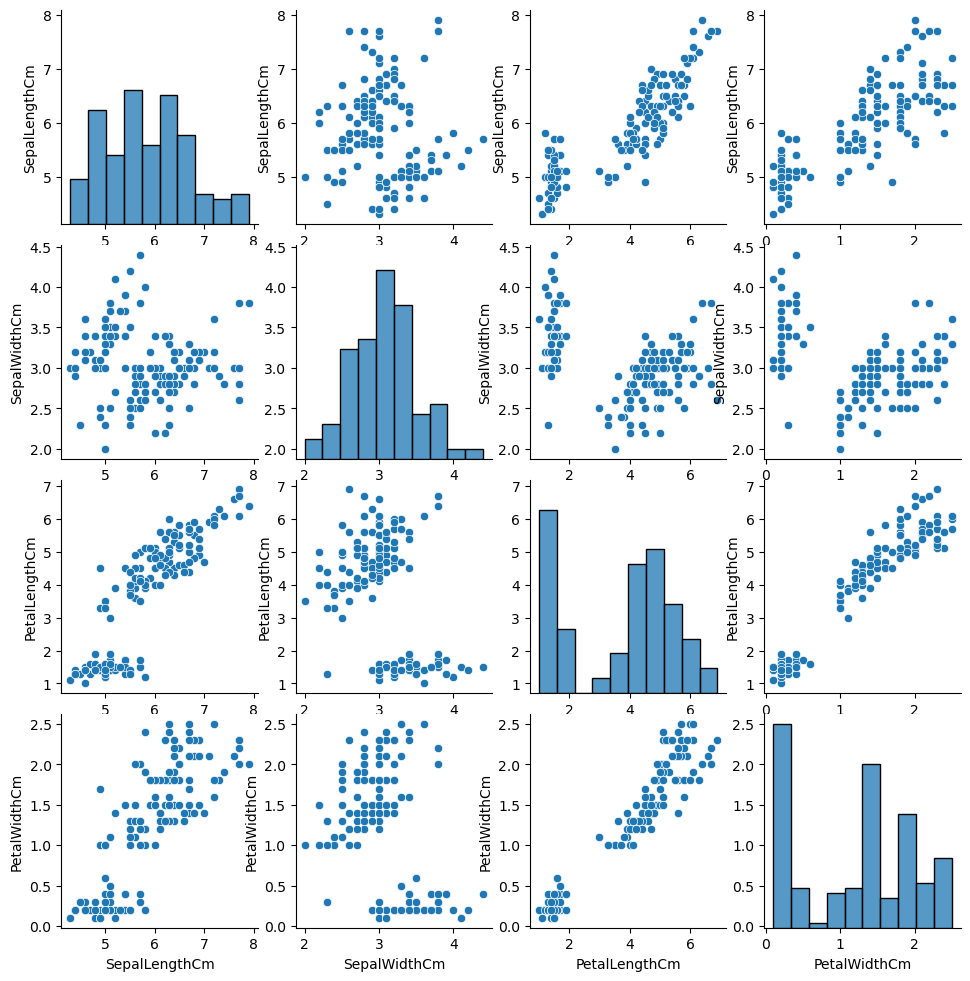

In [48]:
i_plot = plot_pairgrid(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [49]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [50]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### &emsp;&ensp;1.2 With PCA, with Standardization

In [51]:
#Taking only the features
iris_d = iris.iloc[:, [0,1,2,3]]
#Standardize the data
iris_standardized = standardize(iris.iloc[:, [0,1,2,3]])

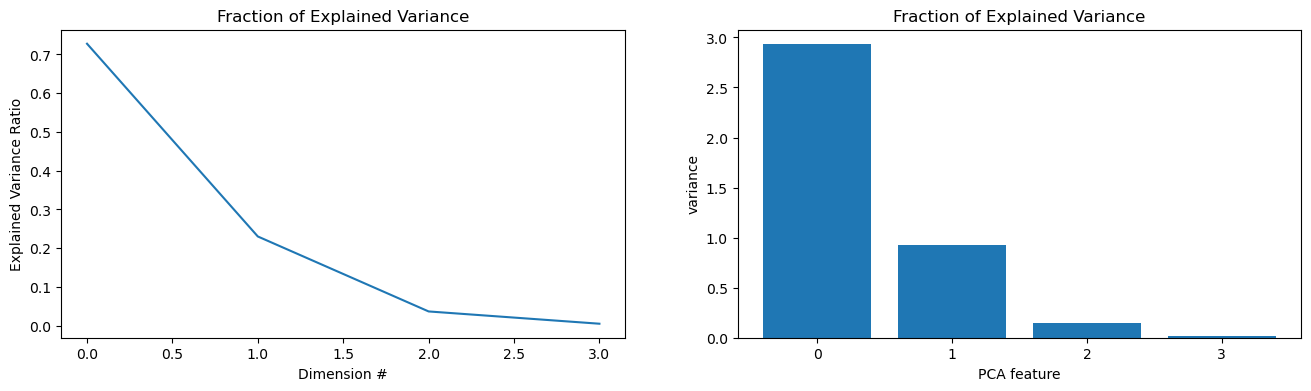


Fraction of Variance explained:

[0.72770452 0.95800975 0.99484807 1.        ]


In [52]:
#PCA
pca = fit_pca(iris_standardized, n_components=iris_d.shape[1])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_scaled_variance_new(pca, ax=ax[0])
plot_variance(pca, ax=ax[1])
plt.show()

print("\nFraction of Variance explained:\n")
print(pca.explained_variance_ratio_.cumsum())

<b>Based on the above and the thumb rule of 85%, it can be seen that 2 components explain ~95% of the variance, hence choosing 2 components for PCA and analysis

In [53]:
#PCA
pca = fit_pca(iris_standardized, n_components=2)
reduced_iris = reduce(pca, iris_standardized)

Determine the ideal number of clusters and epsilon value for k-means and DBSCAN respectively

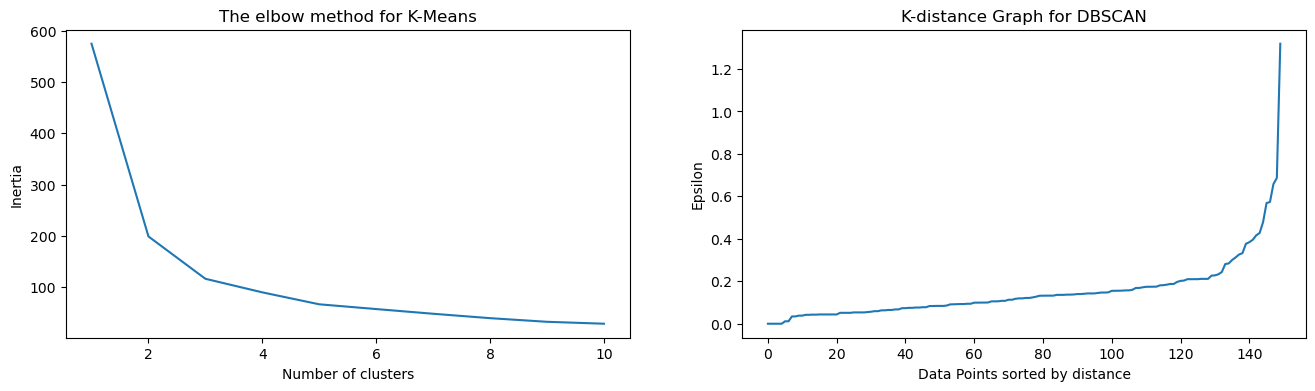

In [54]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_inertia_new(reduced_iris, ax=ax[0])
plot_epsilon(reduced_iris, ax=ax[1])
plt.show()

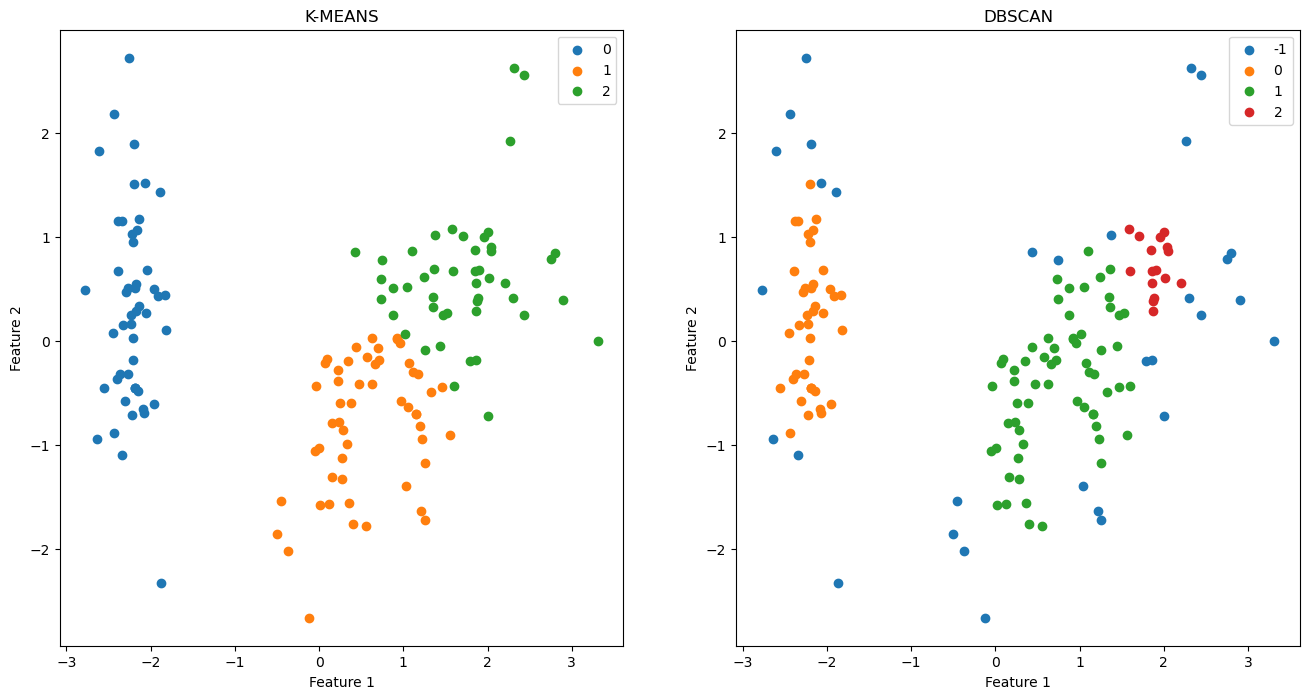

In [55]:
#K-MEANS
k_means, clusters = cluster(reduced_iris, random_state=check_random_state(0), n_clusters=3)

#DBSCAN
dbscan_iris, labels = dbscan_(reduced_iris, eps=0.35, min_samples=7)

fig, ax = plt.subplots(1,2, figsize=(16, 8))

#-----Plot K-MEANS-------
# Getting unique labels
u_labels = np.unique(clusters)
reduced_iris_clusters = pd.DataFrame(reduced_iris)
reduced_iris_clusters['Cluster'] = clusters
 
for i in u_labels:
    ax[0].scatter(reduced_iris_clusters[reduced_iris_clusters['Cluster'] == i][0], 
                reduced_iris_clusters[reduced_iris_clusters['Cluster'] == i][1] , label = i)
ax[0].legend()
ax[0].set_title('K-MEANS')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

#-----Plot DBSCAN------
n_labels = np.unique(labels)
reduced_iris_dbscan = pd.DataFrame(reduced_iris)
reduced_iris_dbscan['Cluster'] = labels

for i in n_labels:
    ax[1].scatter(reduced_iris_dbscan[reduced_iris_dbscan['Cluster'] == i][0], 
                reduced_iris_dbscan[reduced_iris_dbscan['Cluster'] == i][1] , label = i)

ax[1].legend()
ax[1].set_title('DBSCAN')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()

Checking what is labelled by the various algorithms and their accuracy

In [56]:
iris['K-Means'] = clusters
iris['DBSCAN'] = labels

In [57]:
df1 = iris.groupby(['Species']).size().to_frame('count').reset_index().style.hide_index()
df2 = pd.crosstab(iris['K-Means'], iris['Species'])
df3 = pd.crosstab(iris['DBSCAN'], iris['Species'])
display_side_by_side(df1,df2,df3, titles=['Original Data','K-MEANS CLUSTERS', 'DBSCAN CLUSTERS'])

Original Data 
 
 
 
 Species 
 count 
 
 
 
 
 Iris-setosa 
 50 
 
 
 Iris-versicolor 
 50 
 
 
 Iris-virginica 
 50 
 
 
 
 K-MEANS CLUSTERS 
 
 
 Species 
 Iris-setosa 
 Iris-versicolor 
 Iris-virginica 
 
 
 K-Means 
 
 
 
 
 
 
 
 0 
 50 
 0 
 0 
 
 
 1 
 0 
 39 
 14 
 
 
 2 
 0 
 11 
 36 
 
 
 DBSCAN CLUSTERS 
 
 
 Species 
 Iris-setosa 
 Iris-versicolor 
 Iris-virginica 
 
 
 DBSCAN 
 
 
 
 
 
 
 
 -1 
 10 
 8 
 14 
 
 
 0 
 40 
 0 
 0 
 
 
 1 
 0 
 42 
 20 
 
 
 2 
 0 
 0 
 16

##### Observations:

1. After standardizing the data, the elbow method is used to identify the ideal number of clusters for k-means which is 3 for the iris data set.
2. The K-Nearest Neighbors is run to identify the ideal epsilon number and minimum sample points for DBSCAN, which is 0.35 and 7 respectively for the iris data set
3. K-Means is producing 3 clusters - 0, 1, 2.
4. DBSCAN isproducing 3 clusters - 0, 1, 2 and a cluster for noise : -1.
5. On plotting and predicting the labels for both k-means and DBSCAN, it can be seen that:<br>
    5.1 K-Means does show some interlap between versicolor and virginica unlike the original data set.<br>
    5.2 Similarly, DBSCAN is also having an overlap for the above species, it also is classifying 32 datapoints as noise which wasn't identified in both the original and k-means clustering.
    
6. Thus, K-means is forming better clusters, but DBSCAN is able to identify outliers.    

#### 2. Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

In [58]:
reduced_delta = np.load('delta_reduced.npy')

Determine the ideal number of clusters and epsilon value for k-means and DBSCAN respectively

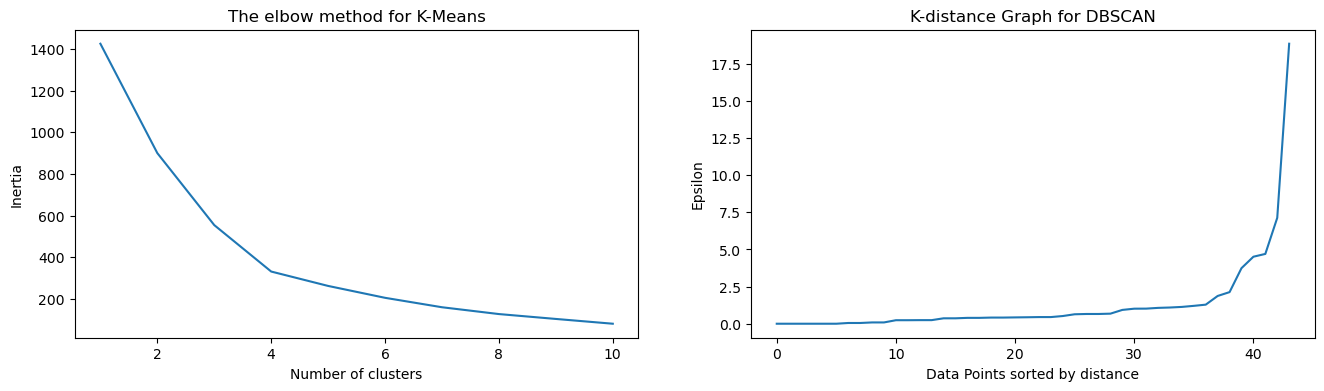

In [59]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_inertia_new(reduced_delta, ax=ax[0])
plot_epsilon(reduced_delta, ax=ax[1])
plt.show()

Plotting first 4 components


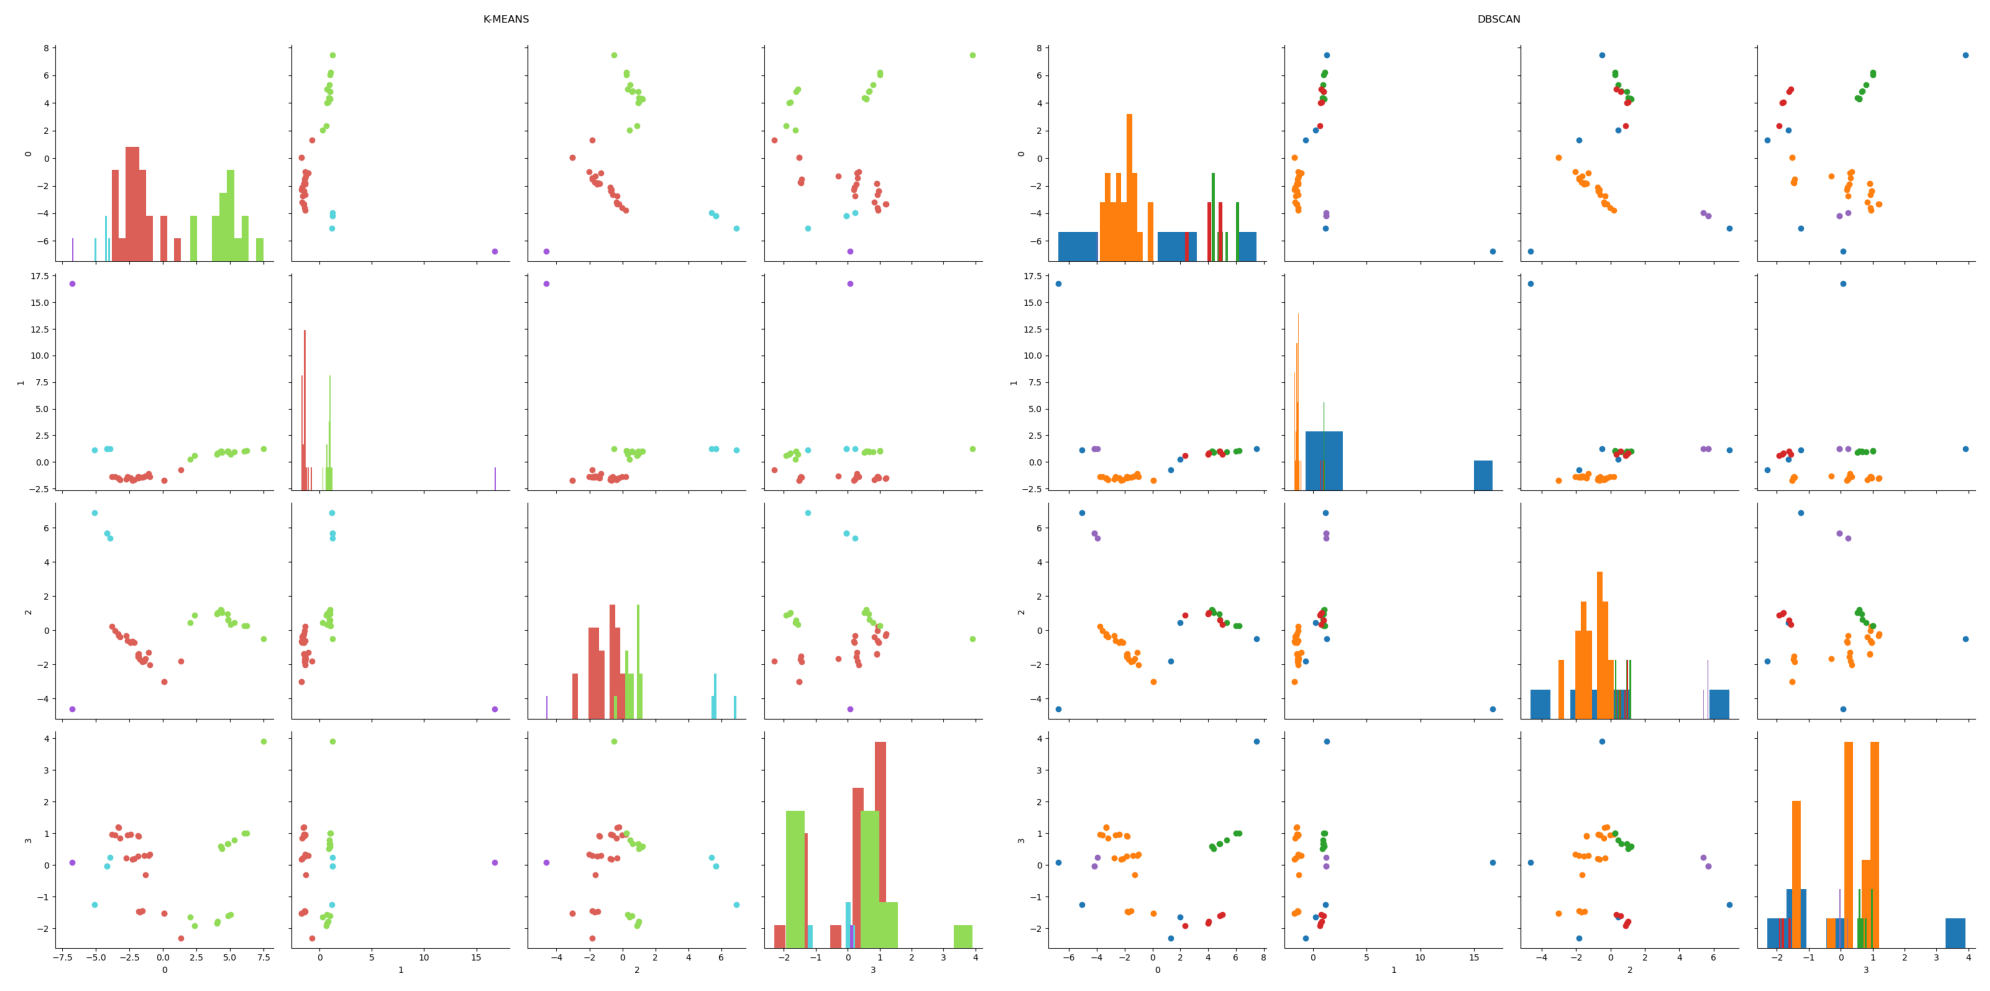

In [60]:
k_means, clusters = cluster(reduced_delta, random_state=check_random_state(0), n_clusters=4)
reduced_delta_clusters, pg = plot_kmeans_pg(reduced_delta, clusters, subset = [0,1,2,3])

pg.savefig('g0.png')
plt.close(pg.fig)


#DBSCAN
dbscan_delta, labels = dbscan_(reduced_delta, eps=3, min_samples=3)
reduced_delta_dbscan, pg1 = plot_dbscan_pg(reduced_delta, subset = [0,1,2,3])

pg1.savefig('g1.png')
plt.close(pg1.fig)

f, axarr = plt.subplots(1, 2, figsize=(20, 70))

axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
print("Plotting first 4 components")
plt.show()

Checking what is labelled by the various algorithms and their accuracy

In [61]:
df = pd.read_csv('delta.csv')
df['K-Means'] = clusters
df['DBSCAN'] = labels

In [62]:
df1 = pd.DataFrame(df.groupby('K-Means')['Aircraft'].apply(list))
df2 = pd.DataFrame(df.groupby('DBSCAN')['Aircraft'].apply(list))

df_1 = df.groupby(['K-Means']).size().to_frame('count')
df_2 = df.groupby(['DBSCAN']).size().to_frame('count')

df1 = df1.merge(df_1, on='K-Means')
df2 = df2.merge(df_2, on='DBSCAN')
display_side_by_side(df1,df2, titles=['K-MEANS', 'DBSCAN'])

,Aircraft,count
K-Means,,
0,"[Airbus A319, Airbus A320, Airbus A320 32-R, Boeing 717, Boeing 737-700 (73W), Boeing 737-800 (738), Boeing 737-800 (73H), Boeing 737-900ER (739), Boeing 757-200 (75A), Boeing 757-200 (75M), Boeing 757-200 (75N), Boeing 757-200 (757), Boeing 757-200 (75V), Boeing 757-300, Boeing 767-300 (76P), Boeing 767-300 (76Q), Boeing 767-300 (76U), CRJ 700, CRJ 900, E170, E175, MD-88, MD-90, MD-DC9-50]",24
1,"[Airbus A330-200, Airbus A330-200 (3L2), Airbus A330-200 (3L3), Airbus A330-300, Boeing 747-400 (74S), Boeing 757-200 (75E), Boeing 757-200 (75X), Boeing 767-300 (76G), Boeing 767-300 (76L), Boeing 767-300 (76T), Boeing 767-300 (76Z V.1), Boeing 767-300 (76Z V.2), Boeing 767-400 (76D), Boeing 777-200ER, Boeing 777-200LR]",15
2,"[CRJ 100/200 Pinnacle/SkyWest, CRJ 100/200 ExpressJet, E120, ERJ-145]",4
3,[Airbus A319 VIP],1
,Aircraft,count
DBSCAN,,
-1,"[Airbus A319 VIP, Boeing 747-400 (74S), Boeing 757-200 (75X), Boeing 767-300 (76U), E120]",5
0,"[Airbus A319, Airbus A320, Airbus A320 32-R, Boeing 717, Boeing 737-700 (73W), Boeing 737-800 (738), Boeing 737-800 (73H), Boeing 737-900ER (739), Boeing 757-200 (75A), Boeing 757-200 (75M), Boeing 757-200 (75N), Boeing 757-200 (757), Boeing 757-200 (75V), Boeing 757-300, Boeing 767-300 (76P), Boeing 767-300 (76Q), CRJ 700, CRJ 900, E170, E175, MD-88, MD-90, MD-DC9-50]",23
1,"[Airbus A330-200, Airbus A330-200 (3L3), Boeing 767-300 (76L), Boeing 767-300 (76T), Boeing 767-300 (76Z V.1), Boeing 767-400 (76D), Boeing 777-200ER, Boeing 777-200LR]",8


##### Observations:

1. After standardizing the data, the elbow method is used to identify the ideal number of clusters for k-means which is 4 for the delta data set.
2. The K-Nearest Neighbors is run to identify the ideal epsilon number and minimum sample points for DBSCAN, which is 3 and 3 respectively for the delta data set
3. K-Means is producing 4 clusters - 0, 1, 2, 3.
4. DBSCAN isproducing 4 clusters - 0, 1, 2, 3 and a cluster for noise : -1.
5. On plotting and predicting the labels for both k-means and DBSCAN, it can be seen that:<br>
    5.1 K-Means is able to form 3 well defined clusters with the 4th cluster containing 1 outlier<br>
    5.2 DBSCAN isn't able to create as well defined clusters as K-Means but it is identifying more outliers<br>
    5.3 Based on the aircraft, the clusters formed are pretty similar.
        
6. Thus, there is not much variation in the classification of the data points by k-means and DBSCAN howoever, K-means is forming better clusters in this scenario, while DBSCAN is able to identify outliers and isn't able to form well defined clusters.

#### 3. Run KMeans on movements.csv compare/discuss the results with DBSCAN and Hierarchical Clustering (Agglomerative). Please submit your code and output, and write down 3-4 sentences that you observed from the results

In [63]:
movements = pd.read_csv('movements.csv')
movements = movements.rename({'Unnamed: 0': 'Company'}, axis = 1)
movements.head()

,Company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [64]:
movements.shape

(60, 964)

In [65]:
movements.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


#### &emsp;&ensp;3.1 With PCA, with Normalization

In [66]:
normalizer = Normalizer()
movements_normalized = normalizer.fit_transform(movements.iloc[:, 1:])
# movements_normalized

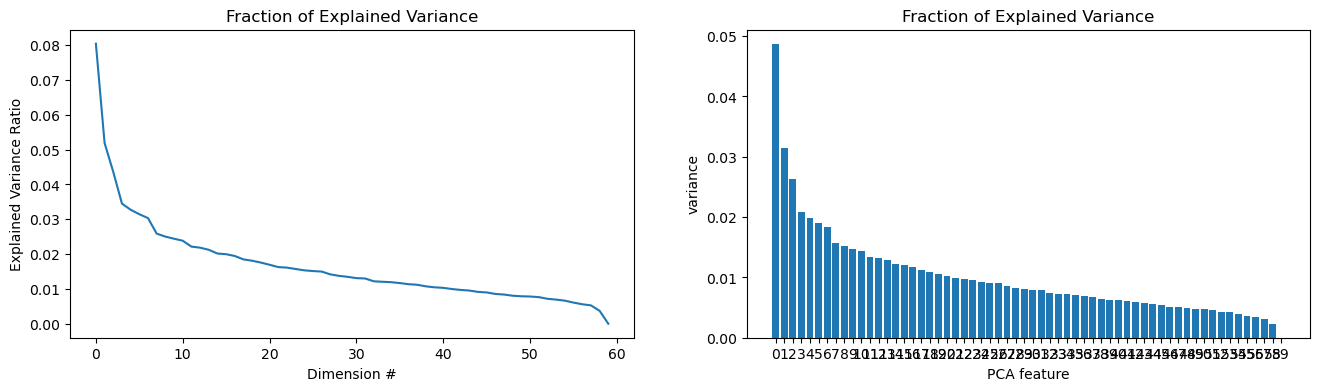


Fraction of Variance explained:

[0.08044047 0.13234997 0.17596652 0.21047527 0.24321654 0.27467471
 0.30501914 0.33089645 0.35592076 0.38034165 0.40418525 0.42633769
 0.4481852  0.46942156 0.48958521 0.50955628 0.52900973 0.54747936
 0.56557442 0.58313634 0.60007148 0.61634323 0.63245876 0.64818027
 0.66351726 0.67864821 0.69362993 0.70780386 0.72155383 0.7350189
 0.74811636 0.76111205 0.77330024 0.78535113 0.79728246 0.80896175
 0.82031487 0.83150369 0.8422381  0.85269607 0.86300395 0.87296762
 0.88267393 0.89220194 0.90134616 0.91033558 0.91888719 0.92726878
 0.9353096  0.9431946  0.95101113 0.95865018 0.96581103 0.97273942
 0.97936701 0.98543119 0.99102412 0.99629495 1.         1.        ]


In [67]:
pca = fit_pca(movements_normalized, n_components=60)

fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_scaled_variance_new(pca, ax=ax[0])
plot_variance(pca, ax=ax[1])
plt.show()

print("\nFraction of Variance explained:\n")
print(pca.explained_variance_ratio_.cumsum())

<b>Based on the above and the thumb rule of 85%, it can be seen that 40 components explain ~85% of the variance, hence choosing 40 components for PCA and analysis

In [68]:
pca = fit_pca(movements_normalized, n_components=40)
reduced_movements = reduce(pca, movements_normalized)
reduced_movements.shape

(60, 40)

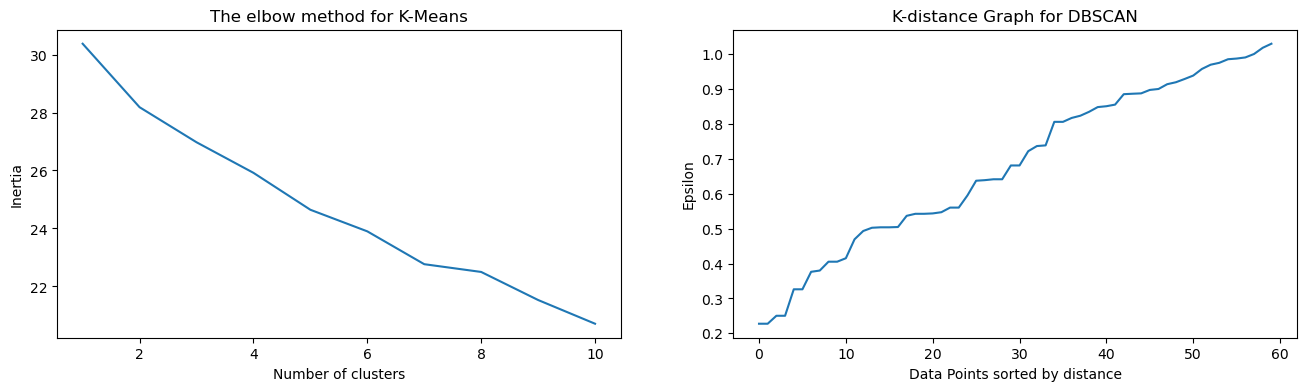

In [69]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_inertia_new(reduced_movements, ax=ax[0])
plot_epsilon(reduced_movements, ax=ax[1])
plt.show()

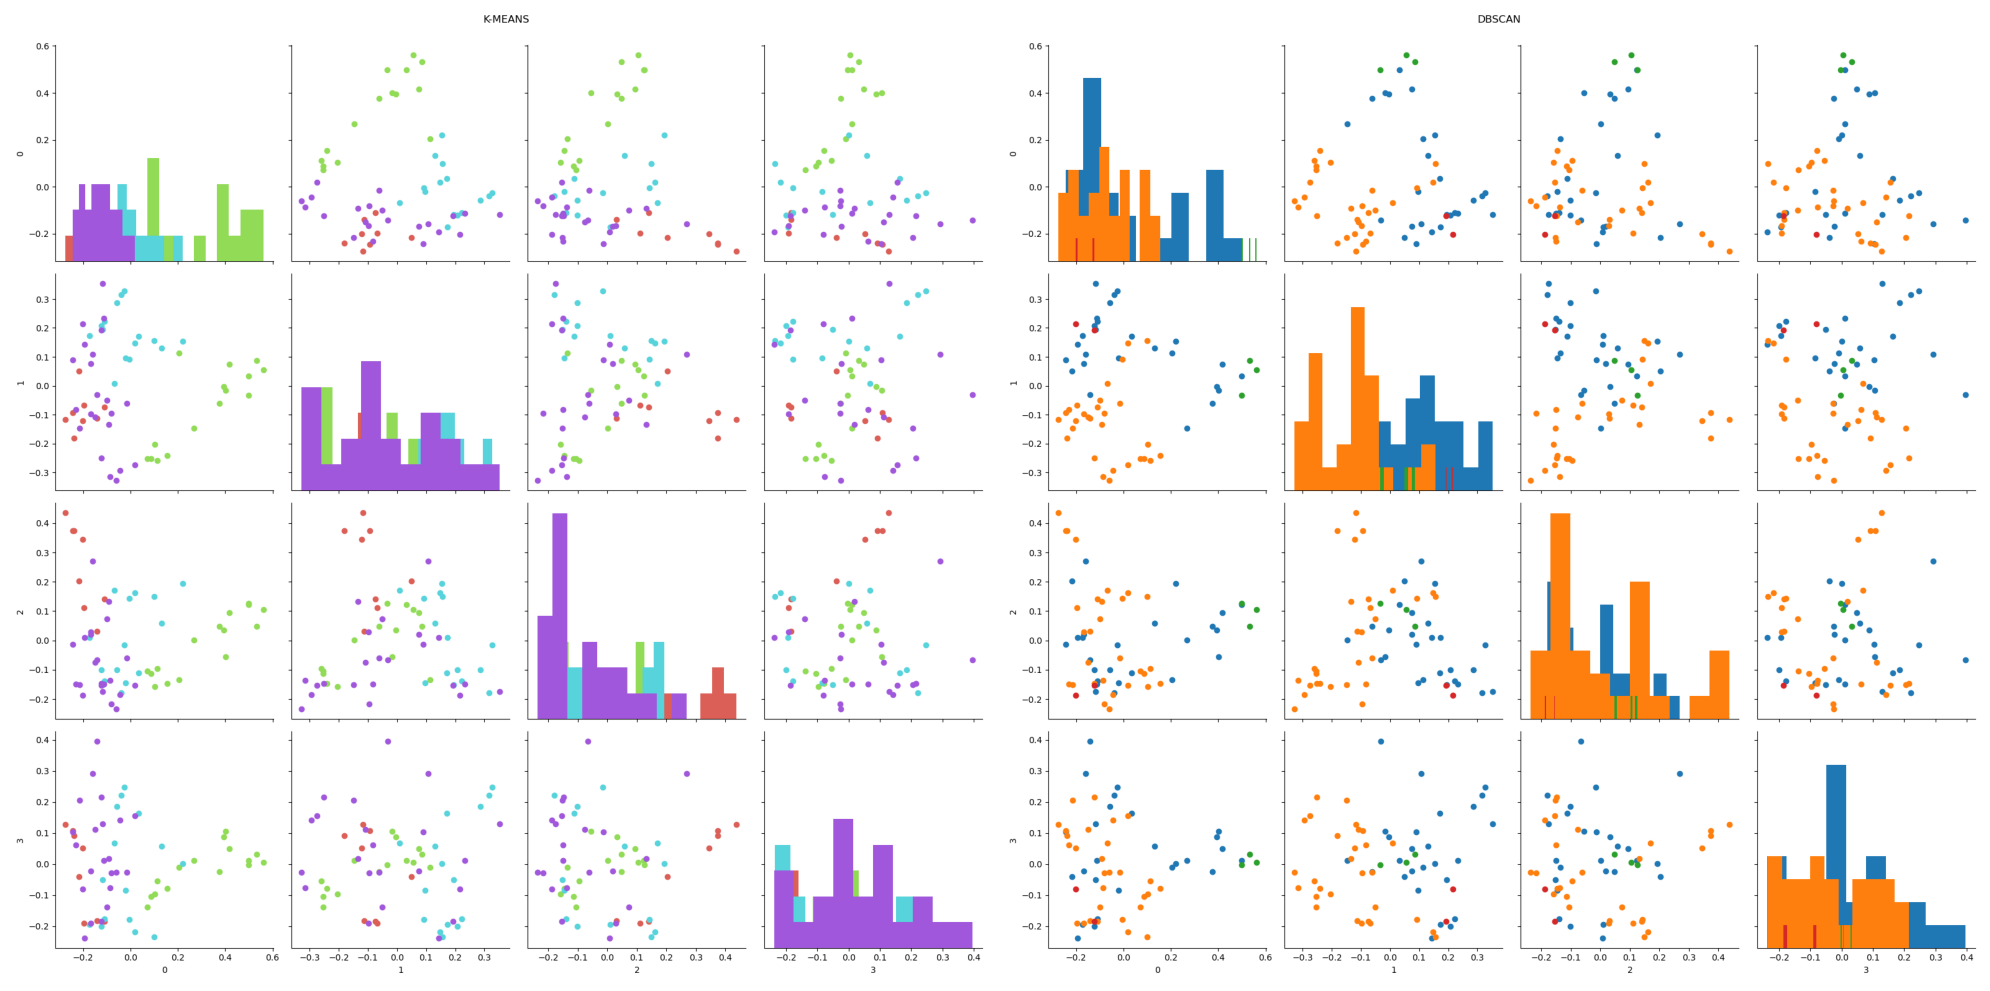

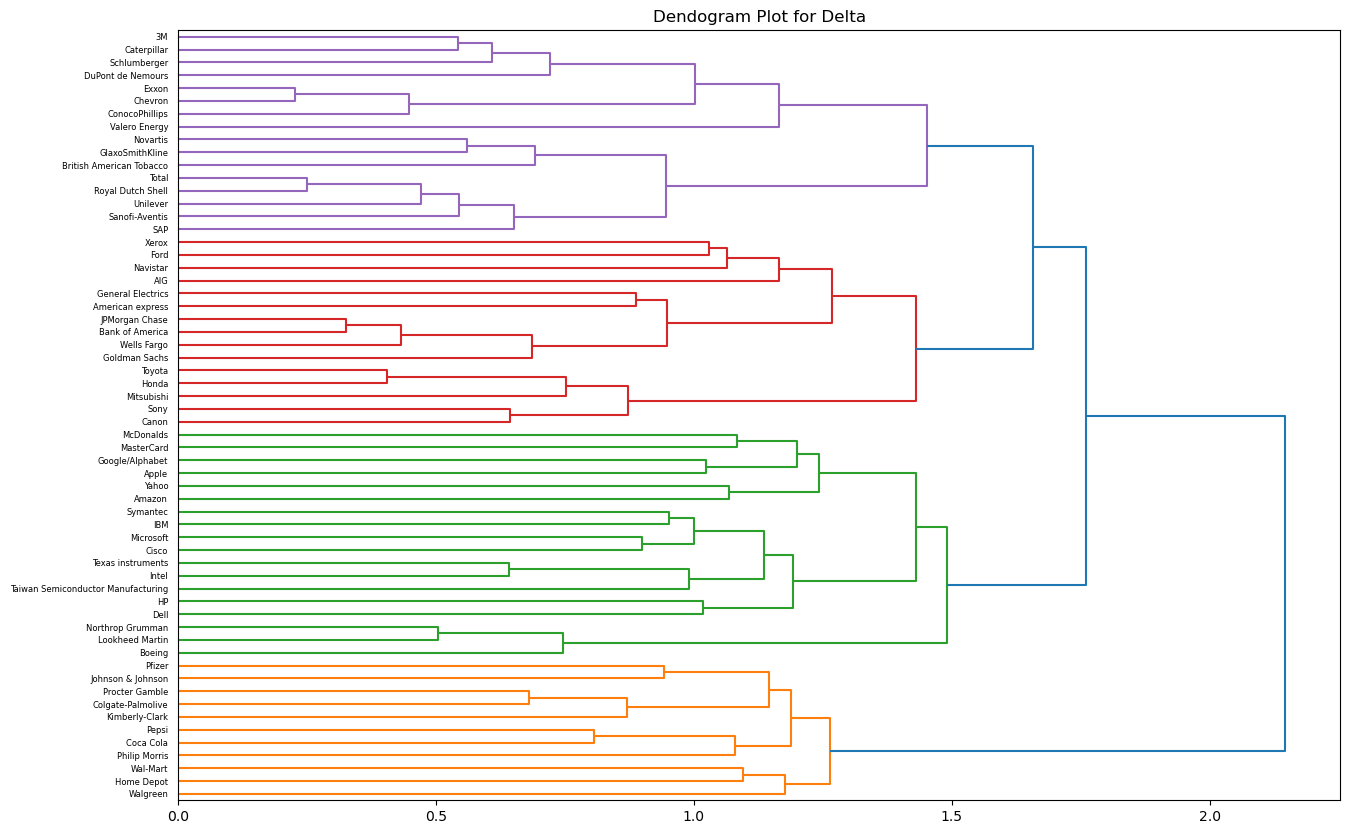

In [70]:
#K-MEANS
k_means, clusters = cluster(reduced_movements, random_state=check_random_state(0), n_clusters=4)
movements_clusters, pg = plot_kmeans_pg(reduced_movements, clusters, subset = [0,1,2,3])

pg.savefig('g0.png')
plt.close(pg.fig)

#DBSCAN
dbscan_movements, labels = dbscan_(reduced_movements, eps=0.8, min_samples=2)
reduced_movements_dbscan, pg1 = plot_dbscan_pg(reduced_movements, subset = [0,1,2,3])

pg1.savefig('g1.png')
plt.close(pg1.fig)

f, axarr = plt.subplots(1, 2, figsize=(20, 50))

axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

#Hierarchical Clustering
plt.figure(figsize=(15, 10))  
plt.title("Dendogram Plot for Delta")
mergings = linkage(reduced_movements, method='ward')

labels_h = fcluster(mergings, 1.6, criterion='distance')
dendrogram(mergings,labels = movements['Company'].unique(),leaf_rotation=0,leaf_font_size=6, orientation = 'right')
plt.show()

In [71]:
movements['Hierarchical'] = labels_h
movements['K-Means'] = clusters
movements['DBSCAN'] = labels

In [72]:
df1 = pd.DataFrame(movements.groupby('Hierarchical')['Company'].apply(list))
df2 = pd.DataFrame(movements.groupby('K-Means')['Company'].apply(list))
df3 = pd.DataFrame(movements.groupby('DBSCAN')['Company'].apply(list))

df_1 = movements.groupby(['Hierarchical']).size().to_frame('count')
df_2 = movements.groupby(['K-Means']).size().to_frame('count')
df_3 = movements.groupby(['DBSCAN']).size().to_frame('count')

df1 = df1.merge(df_1, on='Hierarchical', how = 'left')
df2 = df2.merge(df_2, on='K-Means')
df3 = df3.merge(df_3, on='DBSCAN')
display_side_by_side(df1,df2,df3, titles=['HIERARCHICAL CLUSTERS', 'K-MEANS', 'DBSCAN'])

,Company,count
Hierarchical,,
1,"[Colgate-Palmolive, Home Depot, Johnson & Johnson, Kimberly-Clark, Coca Cola, Pepsi, Pfizer, Procter Gamble, Philip Morris, Walgreen, Wal-Mart]",11
2,"[Apple, Amazon, Boeing, Cisco, Dell, Google/Alphabet, HP, IBM, Intel, Lookheed Martin, MasterCard, McDonalds, Microsoft, Northrop Grumman, Symantec, Taiwan Semiconductor Manufacturing, Texas instruments, Yahoo]",18
3,"[AIG, American express, Bank of America, Canon, Ford, General Electrics, Goldman Sachs, Honda, JPMorgan Chase, Mitsubishi, Navistar, Sony, Toyota, Wells Fargo, Xerox]",15
4,"[British American Tobacco, Caterpillar, ConocoPhillips, Chevron, DuPont de Nemours, GlaxoSmithKline, 3M, Novartis, Royal Dutch Shell, SAP, Schlumberger, Sanofi-Aventis, Total, Unilever, Valero Energy, Exxon]",16
,Company,count
K-Means,,
0,"[Bank of America, Canon, Ford, Goldman Sachs, JPMorgan Chase, Mitsubishi, Sony, Wells Fargo]",8
1,"[British American Tobacco, Colgate-Palmolive, GlaxoSmithKline, Johnson & Johnson, Kimberly-Clark, Coca Cola, McDonalds, Novartis, Pepsi, Pfizer, Procter Gamble, Philip Morris, Sanofi-Aventis, Unilever, Wal-Mart]",15
2,"[Amazon, American express, Boeing, Cisco, Dell, Google/Alphabet, Home Depot, IBM, Lookheed Martin, MasterCard, Microsoft, Northrop Grumman, Symantec, Walgreen, Yahoo]",15


##### Observations:

1. After normalizing the data, the elbow method is used to identify the ideal number of clusters for k-means which is 4 for the movements data set after PCA.
2. The K-Nearest Neighbors is run to identify the ideal epsilon number and minimum sample points for DBSCAN, which is 0.8 and 2 respectively for the movements data set.
3. Hierarchical clustering is producing 4 clusters - 1, 2, 3, 4
4. K-Means is producing 4 clusters - 0, 1, 2, 3.
5. DBSCAN isproducing 4 clusters - 0, 1, 2, 3 and a cluster for noise : -1.
6. On plotting and predicting the labels for the above 3 clustering algorithms, it can be seen that:<br>
    6.1 Hiearchical clustering is producing clusters with cluster 1 representing commercial products, cluster 2 representing IT, cluster 3 seems to be a mix with no specifications while cluster 4 produces a mix of banks and electronics. While the plot shows well defined clusters, there is some overlap when considering the industry the companies belong to so the accuracy seems to be less.<br>
    6.2 K-Means is able to form 4 good clusters, whie plotting it also does show a little overlap and not well defined clusters, however, it can be seen that clusters are more aligned to a particular industry compared to the other two algorithms. Cluster 0 - Banks, car manufacturing; Cluster 1 - Food industry; Cluster 2 - Other companies; Cluster 3 - IT and electronics.<br>
    6.3 DBSCAN is performing similar to K-means just that it's tagging the IT and manufacturing companies under noise and electronics with banks in Cluster0.
        
7. Thus, K-means is providing better clusters when considering the industry space while hierarchical is producing more well defined clusters for visualization purposes. DBSCAN needs a little more fine-tuning. Unlike hierarchical, where it's easier to visualize in 2D, for k-means and DBSCAN, since there are 40 features, it cannot be visualized and only 4 of the features are being visualized in 2D above.

### Problem 4

Apply t-SNE reduction to delta.csv file and compare/discuss the results with PCA. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

In [73]:
delta = pd.read_csv('delta.csv')
delta.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [74]:
delta.shape

(44, 34)

#### &emsp;&ensp;1.2 With tSNE, with Standardization

In [75]:
#Standardize the data
delta_d = delta.iloc[:, 1:]
delta_standardized = standardize(delta_d)

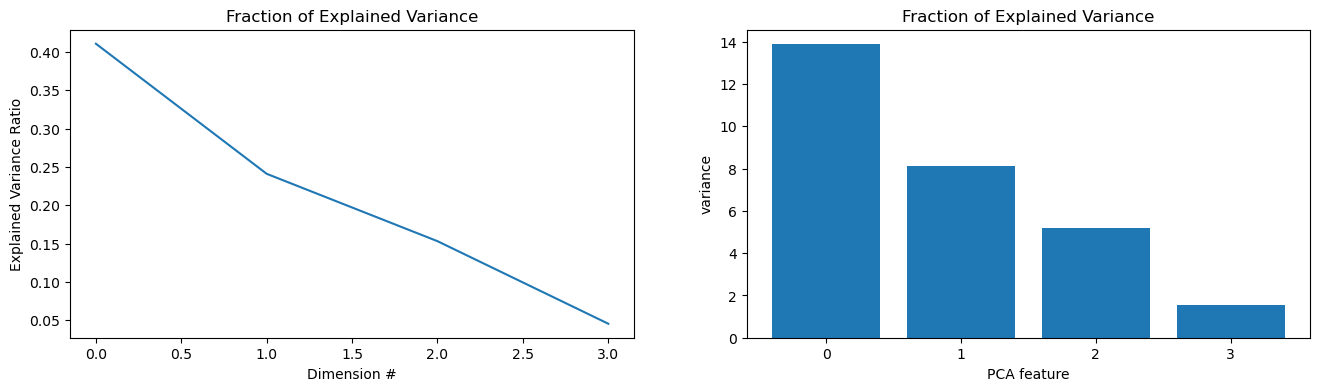


Fraction of Variance explained:

[0.41087056 0.65196109 0.80512715 0.85056976]


In [76]:
pca = fit_pca(delta_standardized, n_components=4)

fig, ax = plt.subplots(1,2, figsize=(16, 4))
plot_scaled_variance_new(pca, ax=ax[0])
plot_variance(pca, ax=ax[1])
plt.show()

print("\nFraction of Variance explained:\n")
print(pca.explained_variance_ratio_.cumsum())
pca = fit_pca(delta_standardized, n_components=4)
reduced_delta = reduce(pca, delta_standardized)

#### Based on above, it can be seen that 4 components explain ~85% of the variation

In [77]:
aircraft=delta['Aircraft'].astype('category').cat.codes
aircraft_names = delta['Aircraft'].unique()

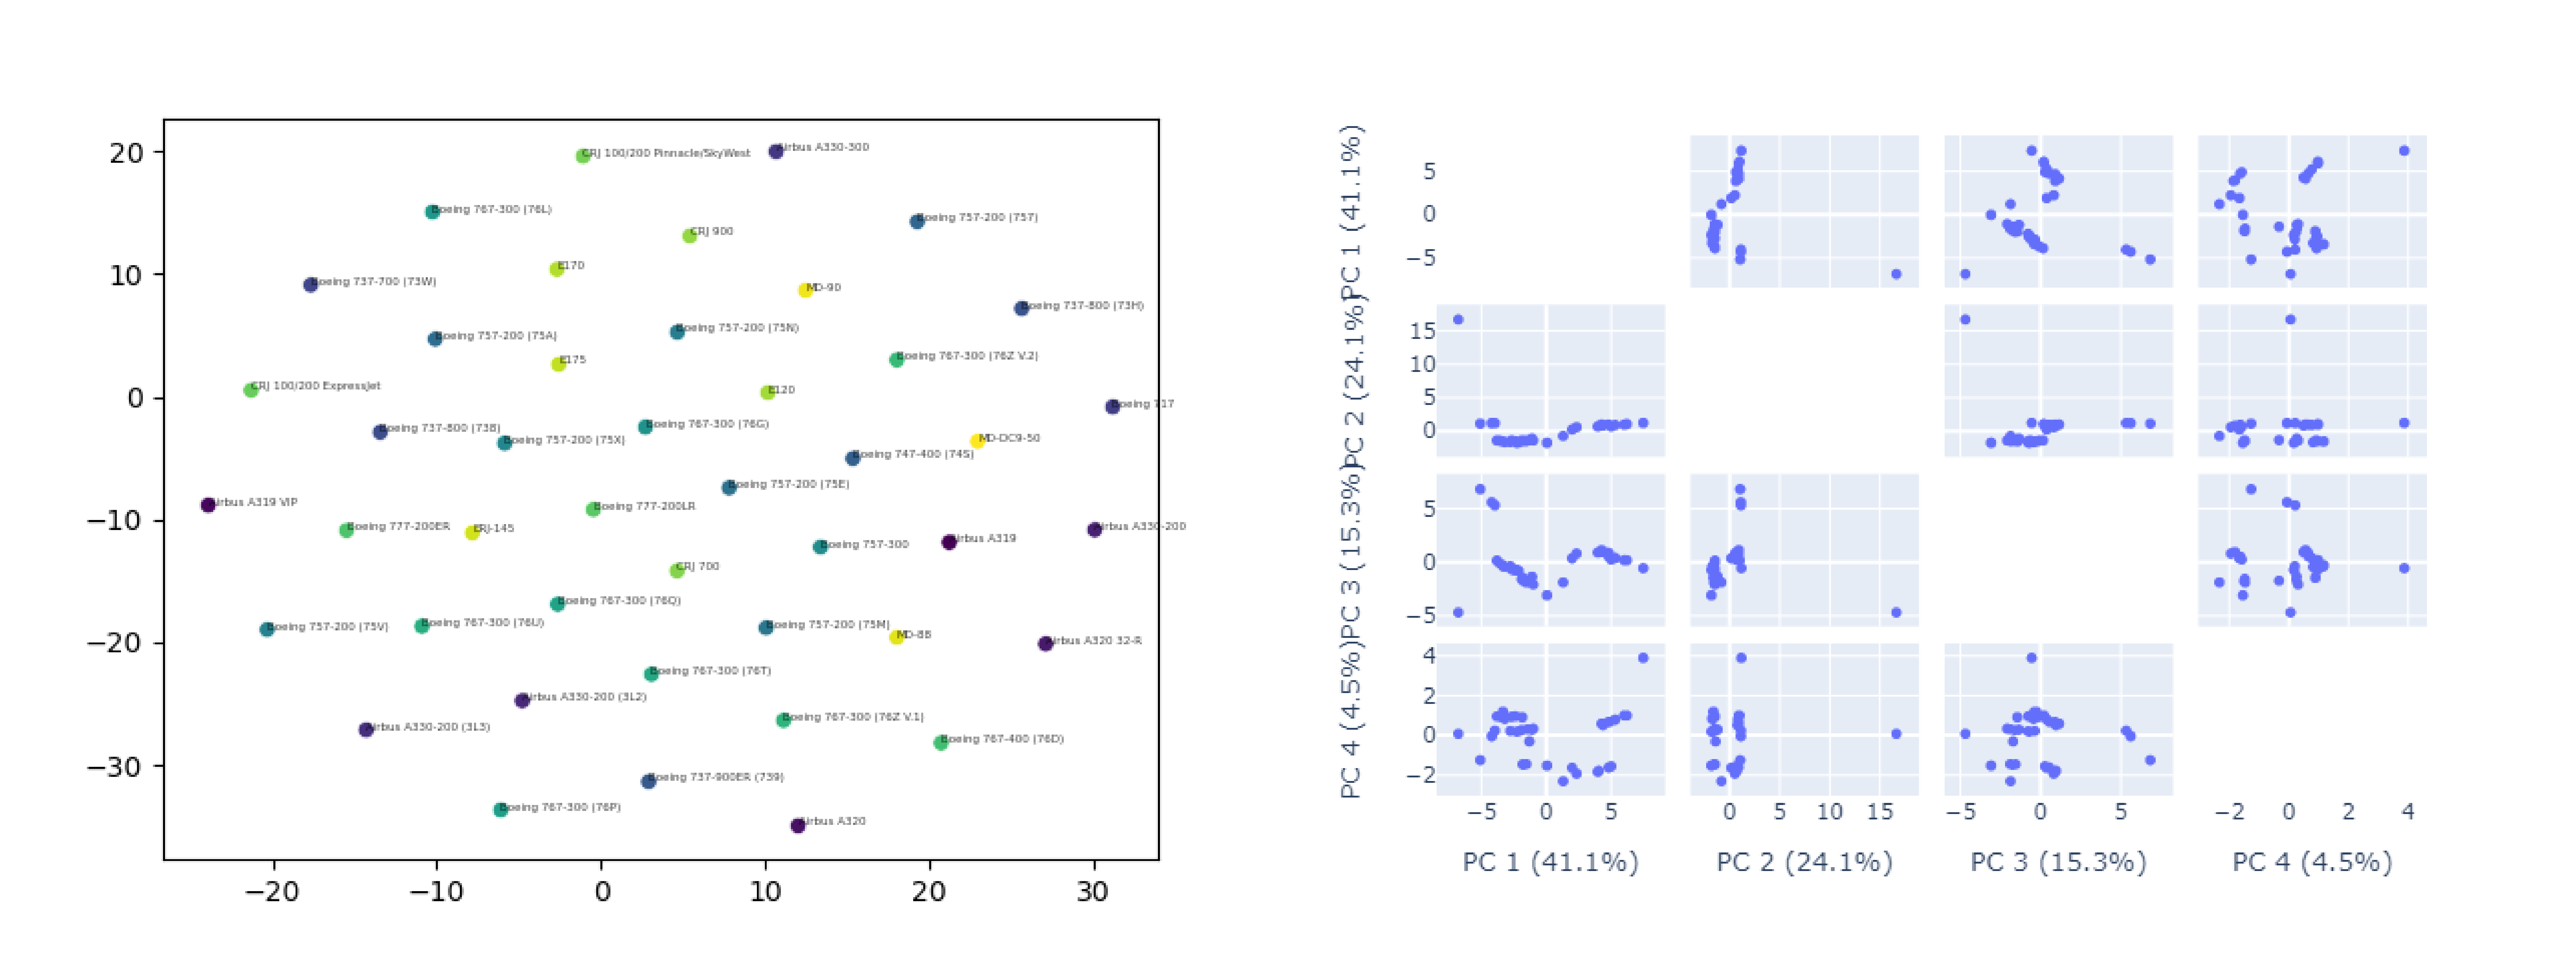

In [78]:
import plotly.express as px
pg = plot_tsne(delta_standardized, learning_rate = 100, perplexity = 50, c=aircraft, labels = aircraft_names)

fig = pg.get_figure()
fig.savefig('fig.png')
plt.close(fig)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

ps = px.scatter_matrix(reduced_delta, labels=labels, dimensions=range(4))

ps.update_traces(diagonal_visible=False)

ps.write_image('fig1.png')

f, axarr = plt.subplots(1, 2, figsize=(100, 150))

axarr[0].imshow(mpimg.imread('fig.png'))
axarr[1].imshow(mpimg.imread('fig1.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

##### Observations:

As seen from the above t-SNE is able to visualize a highly dimensional data in 2D while PCA is even though the reduced version of the dataset, it still cannot be easily visualized beyond 3D. Thus, t-SNE provides a better and early view of the data and gives an idea of how it can be separated.

### Problem 5 (Bonus)

Apply Hiearchical Clustering to delta.csv and observe how physical features are being clustered in ealry leaves at the bottom. Please submit your code and dendrogram graph along with 1-2 sentences interpretation.

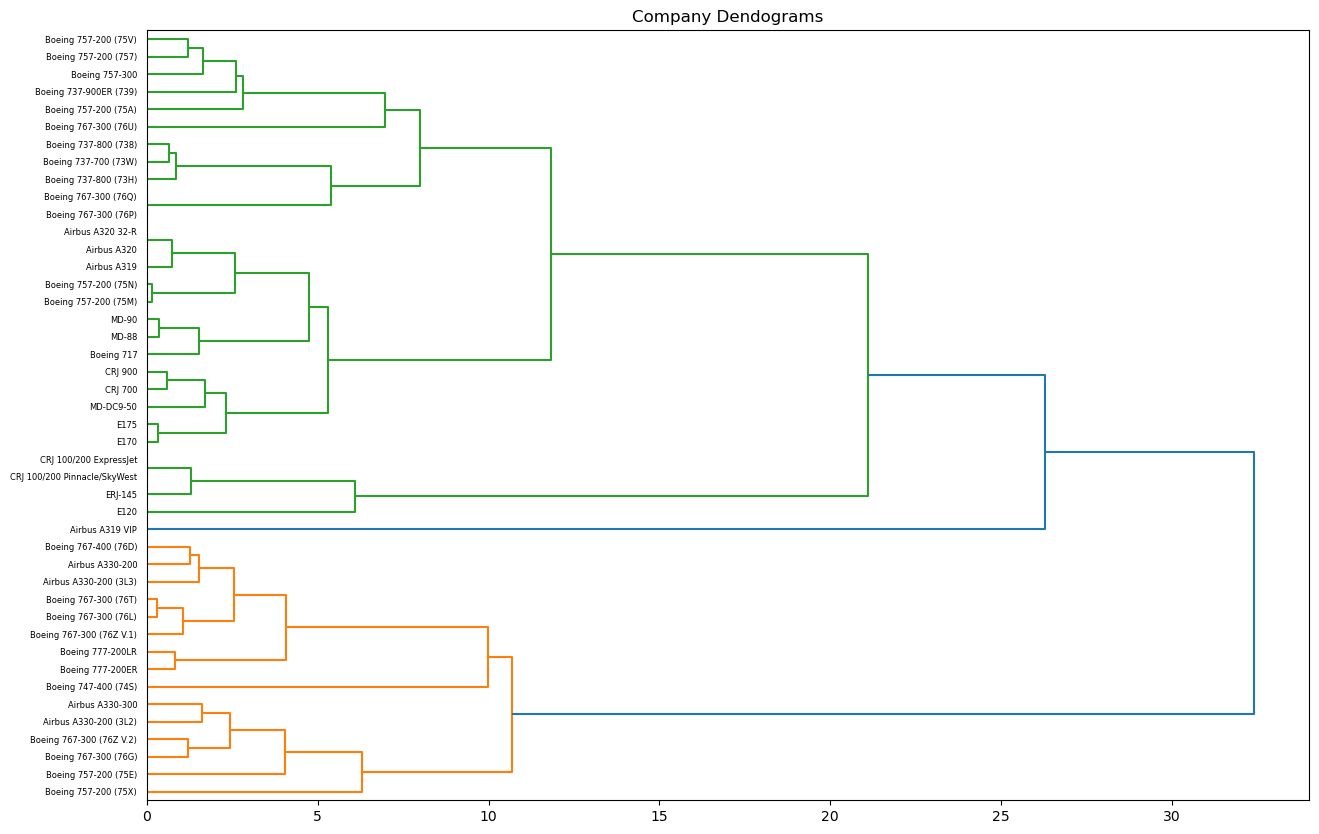

In [79]:
plt.figure(figsize=(15, 10))  
plt.title("Company Dendograms")
mergings = linkage(delta_standardized, method='ward')#ward)

labels = fcluster(mergings, 70, criterion='distance')
dendrogram(mergings,labels = delta['Aircraft'].unique(),leaf_rotation=0,leaf_font_size=6, orientation = 'right')
plt.show()

##### Observations:
From the below, it can be seen that based on feaures like Wingspan, tailheight, seat width, pitch, range covered, the clusters are being formed with Airbus A330-200, Boeing 777-200LR in one cluster (orange cluster) which seems to have higher values for above physical categories compared to Airbus A320, Boeing 737-700 (73W) in cluster green.

In [80]:
delta_t = delta.T
delta_t[[4, 32, 2, 9]]

,4,32,2,9
Aircraft,Airbus A330-200,Boeing 777-200LR,Airbus A320,Boeing 737-700 (73W)
Seat Width (Club),0.0,0.0,0.0,0.0
Seat Pitch (Club),0,0,0,0
Seat (Club),0,0,0,0
Seat Width (First Class),0.0,0.0,21.0,21.0
Seat Pitch (First Class),0.0,0.0,36.0,37.0
Seats (First Class),0,0,12,12
Seat Width (Business),21.0,21.0,0.0,0.0
Seat Pitch (Business),60.0,78.0,0.0,0.0
Seats (Business),32,45,0,0
